In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [2]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem
from astropy.timeseries import LombScargle

In [3]:
lightcurve_ztf = Table.from_pandas(pd.read_csv("J2130.csv"))

In [4]:
row = lightcurve_ztf
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [5]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [6]:
ideal_frequency = np.linspace(0.1, 2.5, 10**6) * (1/u.day)

In [7]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

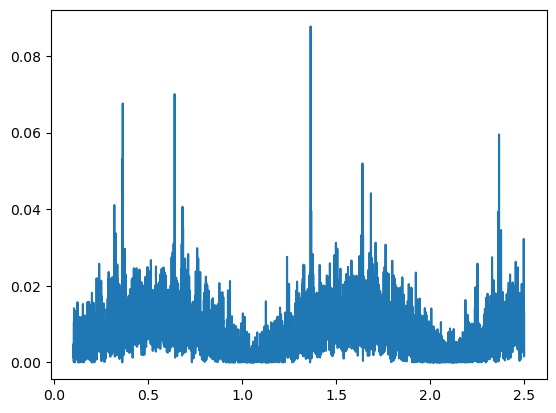

In [8]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [9]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.73349938 d>

Text(0, 0.5, 'R Mag')

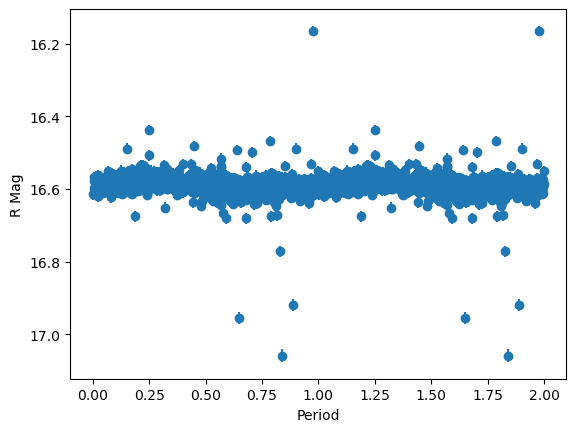

In [10]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
#plt.xlim(0.2,0.45)
#plt.ylim(16.7, 18.5)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

In [11]:
eclipsing = lightcurve_ztf[np.argmin(lightcurve_ztf["mag"])]
eclipsing

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64
769202300030164,108510339,2458839.602905847,58839.1033912,16.1646538,0.0130608724,32768,zr,322.7218234,44.3405218,0.723999977,-0.0930000022,20191222103380,769,2,3,16.4400005,23.1638699,0.1228875592,0.1231106073,0.00104833662,30.0,1.28299999,1


In [12]:
primary_eclipse_time = Time(eclipsing["mjd"], format='mjd')
orbital_period = ztf_p
eclipse_duration = 0.1 * ztf_p

In [13]:
objects = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='J163045')

In [14]:
observing_time = Time('2023-05-05 8:00')
objects.next_primary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 21:58:06.761' '2023-05-06 15:34:21.107'
 '2023-05-07 09:10:35.454' '2023-05-08 02:46:49.801'
 '2023-05-08 20:23:04.147' '2023-05-09 13:59:18.494'
 '2023-05-10 07:35:32.841' '2023-05-11 01:11:47.187']>

In [15]:
objects.next_secondary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 13:09:59.587' '2023-05-06 06:46:13.934'
 '2023-05-07 00:22:28.281' '2023-05-07 17:58:42.627'
 '2023-05-08 11:34:56.974' '2023-05-09 05:11:11.321'
 '2023-05-09 22:47:25.667' '2023-05-10 16:23:40.014']>